# 주피터 노트북 실행할 때
> CMD창에서 
-  http://127.0.0.1:8888/?token=75ca00b1bf3d375e11f06f093cb3f1cae4013b854c5bd767

> 인터넷창에서
- 127.0.0.1: 8888 이라고 치면
- tocken입력하라고 나오면 cmd에 있는 토크 입력하면 됨.

> 토큰
- 서버를 껐다가 킬때마다 매번 바뀜.


# color
- 2^8 = 256
- RGB 3개 컬러 -> 2^24
- 2^16=64k
- 2^32=42억 -> int32의 범위

# 1. 이미지 기초
## 1.1. gray 영상


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
a = np.array([[0,0,0,0],
              [127,127,127,127],
              [200,200,200,200],
              [255,255,255,255]], dtype = 'uint8')

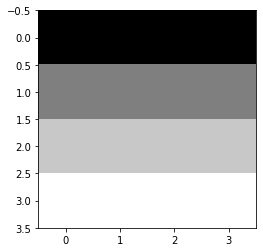

In [11]:
plt.imshow(a, cmap = 'gray')

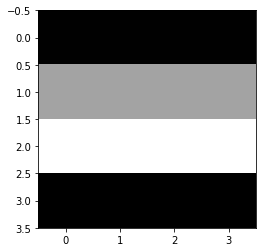

In [13]:
b = a + 10
plt.imshow(b, cmap = 'gray')

## 1.2. color 영상

In [16]:
r = np.array([[255,255,255,255],
              [0,0,0,0],
              [0,0,0,0],
              [255,255,255,255]], dtype = 'uint8') 

g = np.array([[0,0,0,0],
              [255,255,255,255],
              [0,0,0,0],
              [255,255,255,255]], dtype = 'uint8') 

b = np.array([[0,0,0,0],
              [0,0,0,0],
              [255,255,255,255],
              [0,0,0,0]], dtype = 'uint8') 
              
              

In [17]:
img = np.dstack([r,g,b])

- plt.show()를 사용하면 오버로드 없이 모든 그래프를 볼 수 있음.

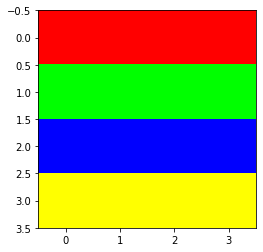

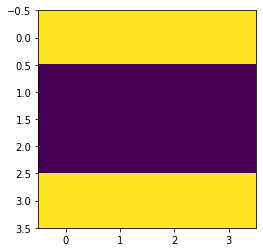

In [20]:
plt.imshow(img)
plt.show()
plt.imshow(r)
plt.show()

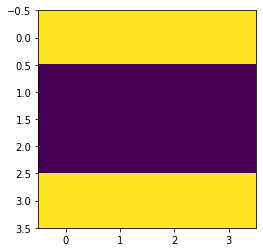

In [19]:
plt.imshow(r)

In [21]:
one= np.zeros((4,4))
one

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


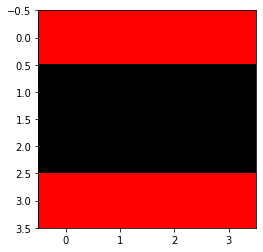

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


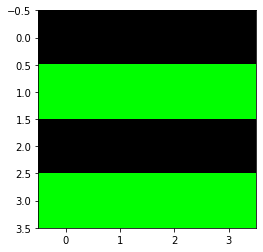

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


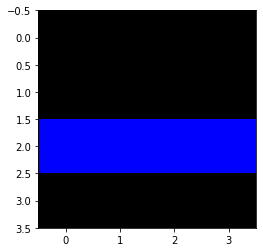

In [23]:
plt.imshow(np.dstack([r, one, one]))
plt.show()
plt.imshow(np.dstack([one,g, one]))
plt.show()
plt.imshow(np.dstack([one, one,b]))
plt.show()

## 1.3. img read

In [42]:
img = cv2.imread('../data/lalaland.jpg', 1)

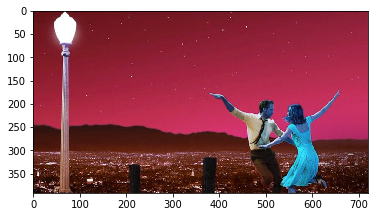

In [38]:
plt.imshow(img, cmap = 'winter_r')

In [32]:
type(img)

numpy.ndarray

In [33]:
img.shape

(392, 720, 3)

### 3.1.1. BGR -> RGB: 수동

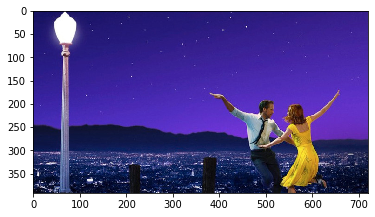

In [40]:
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

rgb_img = np.dstack([r, g, b])
plt.imshow(rgb_img)

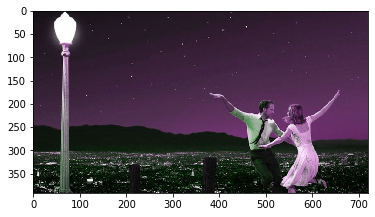

In [41]:
# 원본 이미지 변경. 추천x
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

img[:,:,0]=r
img[:,:,1]=g
img[:,:,2]=b

plt.imshow(img)

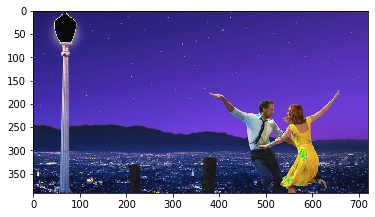

In [43]:
b = img[:,:,0] + 10
g = img[:,:,1] +10
r = img[:,:,2] +10

rgb_img = np.dstack([r, g, b])
plt.imshow(rgb_img)

### 1.3.2. BGR -> RGB :자동

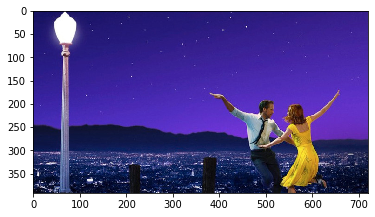

In [46]:
# 보여줄때만 convert해서 보여주기(opencv로 처리할 때는 BGR로 하기)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

## 1.4. img 저장

In [48]:
# 저장할 때도 BGR로 저장하므로 주의!
cv2.imwrite('result.jpg', rgb)

True

<img src = 'result.jpg' width = 500>

# 2. 컬러 모델 종류
## 2.1.CMYK 컬러 모델
## 2.2 HSI 컬러 모델
- HSI = Hue(색상), Saturation(채도), Intensity(밀도)

## 2.3. YCrCb 모델
- Y: 명도
- Cr: 푸른색
- Cb: 붉은색 정보

## 2.4. 예제: HSV 로 변경-> 얼굴색만 추출하기

#### 포인터 개념

- int당 4yte이므로 a, b 이므로 8byte를 가리킬 것 같지만, 
- 파이썬에서는 a, b 모두 8을 가리키고 있기 때문에 4byte만 차지하고 있음.

In [59]:
a = 8
b = 8

In [60]:
id(a)

140713313870448

In [62]:
id(b)

140713313870448

In [71]:
img = cv2.imread('../data/bogum.jpg')

In [83]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

In [73]:
# 다른 메모리 공간에 복사하기
result= img.copy()

In [79]:
for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        # 흑백 이미지 -> 숫자를 더할 때 uint8이므로 overflow 발생
        # 기본이 4bite -> int 32(4byte)로 바꾸기
        # int32 + 8byte를 더하면 int32로 자동형변환됨
        #col = (img[r, c, 0] + img[r, c, 1] + img[r, c, 2]) / 3
        col = (int(img[r, c, 0]) + img[r, c, 1] + img[r, c, 2]) / 3

        result[r, c, 0] = col
        result[r, c, 1] = col
        result[r, c, 2] = col

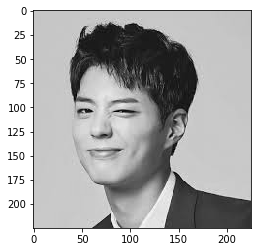

In [80]:
plt.imshow(result)

In [7]:
#피부색의 범위
lower = np.array([0,48,80], dtype = 'uint8')
upper = np.array([20,255,255], dtype = 'uint8')

In [78]:
h.shape

(1350, 900)

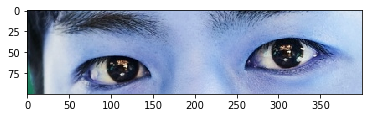

In [95]:
plt.imshow(img[400:500,200:600])

In [85]:
h[300:500,300:600]

array([[ 9,  9,  8, ..., 11,  9, 11],
       [ 9,  9,  8, ..., 11,  9, 11],
       [ 8,  8,  9, ...,  9,  5,  8],
       ...,
       [ 9,  9,  9, ..., 12, 13, 13],
       [ 9,  9,  9, ..., 12, 12, 12],
       [10, 10, 10, ..., 12, 12, 12]], dtype=uint8)

In [86]:
# 색 기준으로만 판단
for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        if h[r, c] >=0 and h[r, c] <=20:
           
            result[r,c,0] = img[r,c,0]
            result[r,c,1] = img[r,c,1]
            result[r,c,2] = img[r,c,2]
        else:
            result[r,c,0] = 0
            result[r,c,1] = 0
            result[r,c,2] = 0
            

In [87]:
img2 = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

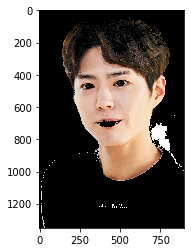

In [88]:
plt.imshow(img2)

In [89]:
# 세 가지 기준 모두 판단
result= img.copy()
mask = img.copy()

for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        bh = h[r, c] >= 0 and h[r, c] <= 20
        bs = s[r, c] >= 45 and h[r, c] <= 255
        bv = v[r, c] >= 80 and h[r, c] <= 255
        if bh and bs and bv:
            result[r,c,0] = img[r,c,0]
            result[r,c,1] = img[r,c,1]
            result[r,c,2] = img[r,c,2]
            # result[r,c,:] = img[r,c,:]
            mask[r,c,0] = 255
            mask[r,c,1] = 255
            mask[r,c,2] = 255
            mask[r,c,:] = 255
        else:
            result[r,c,0] = 0
            result[r,c,1] = 0
            result[r,c,2] = 0
            # result[r,c,:] = 0
            mask[r,c,0] = 0
            mask[r,c,1] = 0
            mask[r,c,2] = 0
            #mask[r,c,:] = 0

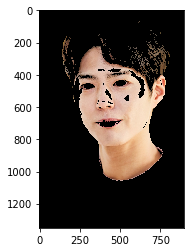

In [90]:
img3 = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(img3)

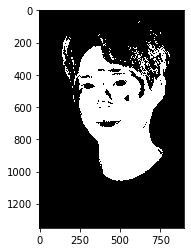

In [91]:
plt.imshow(mask)

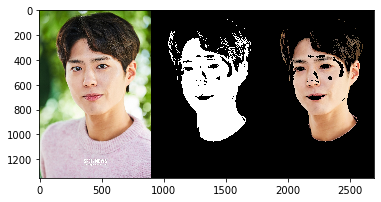

In [96]:
all = np.hstack([img, mask, result])
plt.imshow(cv2.cvtColor(all, cv2.COLOR_BGR2RGB))

### 얼굴 색의 범위 찾기

In [97]:
# 패치 파일 만들어서 갖고오기
train = cv2.imread('../data/patch.png')
train.shape

(265, 330, 3)

#### b,g,r,로 확인하기

In [98]:
b,g,r = cv2.split(train)

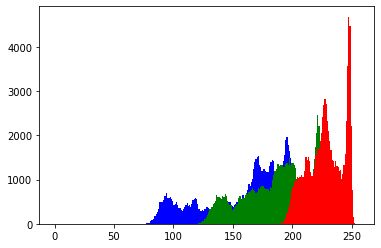

In [110]:
# ravel(): 1차원으로 만들기
plt.hist(x=b.ravel(), bins =256, range = [0,256], color = 'b')
plt.hist(x=g.ravel(), bins =256, range = [0,256], color = 'g')
plt.hist(x=r.ravel(), bins =256, range = [0,256], color = 'r')
plt.show()

#### h,s,v로 확인하기

In [111]:
hsv = cv2.cvtColor(train, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

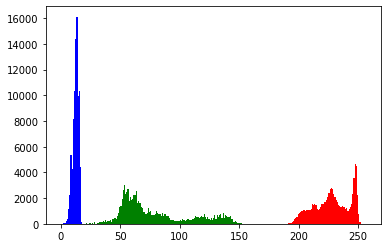

In [112]:
plt.hist(x=h.ravel(), bins =256, range = [0,256], color = 'b')
plt.hist(x=s.ravel(), bins =256, range = [0,256], color = 'g')
plt.hist(x=v.ravel(), bins =256, range = [0,256], color = 'r')
plt.show()

- BGV보다는 HSV로 분류하는 것이 나은 결과를 가져옴!!

### 배경도 저런 패턴이 있을까?

In [114]:
# 패치 파일 만들어서 갖고오기
train = cv2.imread('../data/patch2.png')
train.shape

(282, 554, 3)

#### b,g,r,로 확인하기

In [115]:
b,g,r = cv2.split(train)

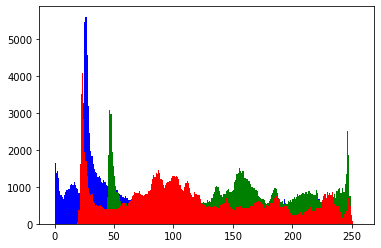

In [116]:
# ravel(): 1차원으로 만들기
plt.hist(x=b.ravel(), bins =256, range = [0,256], color = 'b')
plt.hist(x=g.ravel(), bins =256, range = [0,256], color = 'g')
plt.hist(x=r.ravel(), bins =256, range = [0,256], color = 'r')
plt.show()

#### h,s,v로 확인하기

In [117]:
hsv = cv2.cvtColor(train, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

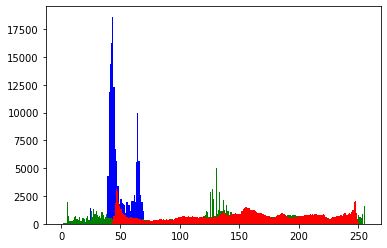

In [118]:
plt.hist(x=h.ravel(), bins =256, range = [0,256], color = 'b')
plt.hist(x=s.ravel(), bins =256, range = [0,256], color = 'g')
plt.hist(x=v.ravel(), bins =256, range = [0,256], color = 'r')
plt.show()

- 얼굴에 비해 배경이 색상 푼포나, hsv의 분포가 넓다른 것을 확인할 수 있음.
- 상황에 따라 다른 비전 알고리즘을 적용해야 함..ㅜㅠ

### 기상캐스터 해보자

In [159]:
img = cv2.imread('../data/cromakey.png')

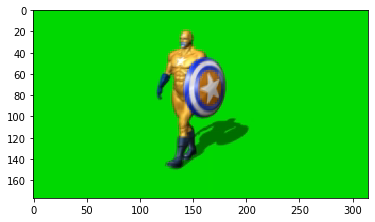

In [160]:
plt.imshow(img)

In [161]:
b,g,r = cv2.split(img)

(array([1.2810e+03, 4.9621e+04, 1.8600e+02, 5.5000e+01, 1.0500e+02,
        2.7000e+01, 8.1000e+01, 5.1000e+01, 1.8000e+01, 4.6000e+01,
        5.7000e+01, 3.3000e+01, 5.6000e+01, 3.1000e+01, 5.2000e+01,
        4.5000e+01, 4.4000e+01, 4.2000e+01, 5.6000e+01, 4.8000e+01,
        5.8000e+01, 4.5000e+01, 5.5000e+01, 4.3000e+01, 4.0000e+01,
        5.0000e+01, 3.2000e+01, 4.4000e+01, 4.6000e+01, 4.6000e+01,
        4.5000e+01, 4.7000e+01, 3.8000e+01, 3.8000e+01, 4.2000e+01,
        4.2000e+01, 3.8000e+01, 4.3000e+01, 3.6000e+01, 3.8000e+01,
        3.9000e+01, 4.7000e+01, 3.8000e+01, 3.0000e+01, 2.2000e+01,
        3.0000e+01, 2.7000e+01, 2.4000e+01, 3.1000e+01, 3.5000e+01,
        4.3000e+01, 2.8000e+01, 2.2000e+01, 3.6000e+01, 2.8000e+01,
        3.6000e+01, 2.3000e+01, 2.7000e+01, 2.4000e+01, 3.6000e+01,
        2.1000e+01, 3.3000e+01, 3.7000e+01, 2.7000e+01, 2.9000e+01,
        2.3000e+01, 3.0000e+01, 3.0000e+01, 2.4000e+01, 3.4000e+01,
        3.0000e+01, 1.7000e+01, 2.9000e+01, 2.50

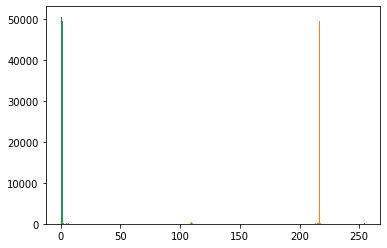

In [162]:
plt.hist(b.ravel(), bins = 255, range = [0,255])
plt.hist(g.ravel(), bins = 255, range = [0,255])
plt.hist(r.ravel(), bins = 255, range = [0,255])

In [163]:
hvs_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, v, s = cv2.split(hvs_img)

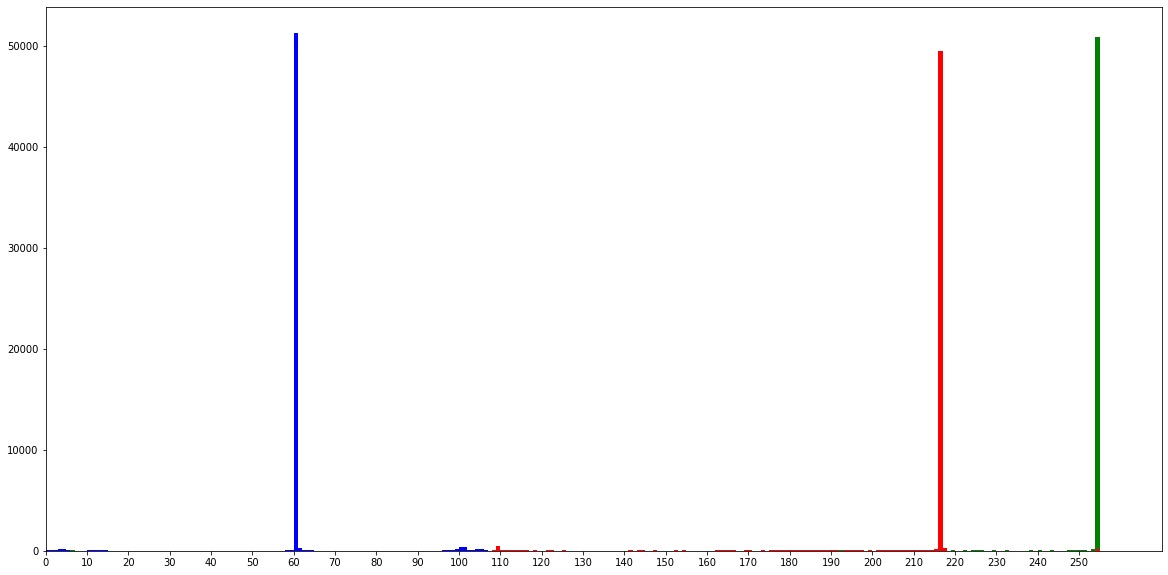

In [180]:
plt.figure(figsize = (20,10))
plt.hist(h.ravel(), bins = 255, range= [0,255], color = 'b')
plt.hist(v.ravel(), bins = 255, range= [0,255], color = 'g')
plt.hist(s.ravel(), bins = 255, range= [0,255], color = 'r')
plt.xlim([0,270])
plt.xticks(np.arange(0,260,10))
plt.show()

In [185]:
result = img.copy()
mask = img.copy()

for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        hh = h[r,c]>= 55 and h[r,c]<= 65
        vv = v[r,c]>= 250 and v[r,c]<= 255
        ss = s[r,c]>= 210 and s[r,c]<= 220

        if not(hh and ss and vv):
            result[r, c, :]= img[r,c,:]
            mask[r,c,:] = 255
        else:
            result[r, c, :]= 0
            mask[r,c,:] = 0

In [186]:
all = np.hstack((img, result, mask))

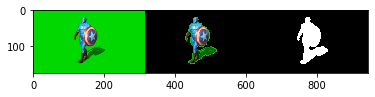

In [187]:
plt.imshow(cv2.cvtColor(all, cv2.COLOR_BGR2RGB))

# 형이 다른 데이터를 보관하는 자료형
- 튜플
- list
- dict

## 자동으로 만들기


(array([7.7000e+01, 5.2000e+01, 9.3000e+01, 1.8400e+02, 2.1700e+02,
       7.0000e+01, 2.4000e+01, 1.1000e+01, 2.0000e+00, 1.7000e+01,
       3.8000e+01, 8.4000e+01, 9.0000e+01, 6.3000e+01, 3.0000e+01,
       1.3000e+01, 1.7000e+01, 9.0000e+00, 1.0000e+01, 1.0000e+00,
       9.0000e+00, 1.4000e+01, 7.0000e+00, 8.0000e+00, 3.0000e+00,
       6.0000e+00, 4.0000e+00, 1.0000e+00, 8.0000e+00, 1.1000e+01,
       6.0000e+00, 5.0000e+00, 1.3000e+01, 3.0000e+00, 4.0000e+00,
       7.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 4.0000e+00,
       2.0000e+00, 3.0000e+00, 1.3000e+01, 6.0000e+00, 1.1000e+01,
       2.0000e+00, 1.1000e+01, 1.6000e+01, 1.5000e+01, 5.0000e+00,
       8.0000e+00, 8.0000e+00, 1.2000e+01, 1.3000e+01, 2.4000e+01,
       2.1000e+01, 2.8000e+01, 2.4000e+01, 5.6000e+01, 6.5000e+01,
       5.1295e+04, 2.3000e+02, 6.3000e+01, 3.4000e+01, 4.3000e+01,
       1.5000e+01, 1.6000e+01, 1.7000e+01, 2.4000e+01, 1.7000e+01,
       1.5000e+01, 9.0000e+00, 1.1000e+01, 1.3000e+01, 9.0000

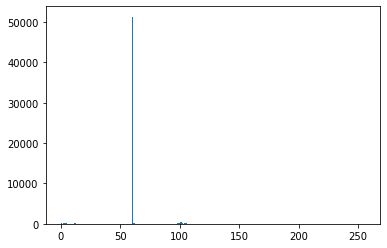

In [173]:
hi = plt.hist(h.ravel(), 256, [0,256])
print(hi)

In [188]:
# 빈도수 
hi[0].shape

(256,)

In [189]:
# bin 수
hi[1].shape

(257,)

In [176]:
hi[2]

<a list of 256 Patch objects>

In [190]:
value = (np.where(hi[0]==np.max(hi[0])))[0][0]
value

60

In [192]:
np.where(hi[0]==np.max(hi[0]))

(array([60], dtype=int64),)

#### RGB 이미지일 경우

- train 이미지

In [241]:
img = cv2.imread('../data/cromakey.png')

b, g, r = cv2.split(img)

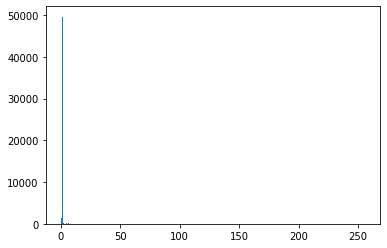

In [217]:
hr=plt.hist(r.ravel(), 256, [0,256])

In [236]:
np.where(hr[0]==np.max(hr[0]))

(array([1], dtype=int64),)

In [237]:
np.where(hr[0]==np.max(hr[0]))[0]

array([1], dtype=int64)

In [238]:
np.where(hr[0]==np.max(hr[0]))[0][0]

1

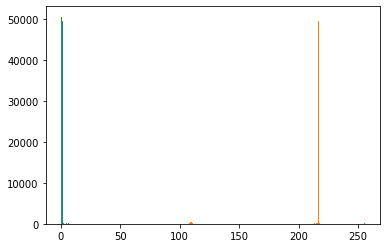

In [201]:
hr = plt.hist(r.ravel(), 256, [0,256])
hg = plt.hist(g.ravel(), 256, [0,256])
hb = plt.hist(b.ravel(), 256, [0,256])

In [233]:
max_r = (np.where(hr[0]==np.max(hr[0])))[0][0]
max_g = (np.where(hg[0]==np.max(hg[0])))[0][0]
max_b = (np.where(hb[0]==np.max(hb[0])))[0][0]
print(max_r, max_g, max_b)

1 216 0


- test data

In [234]:
test = cv2.imread('../data/fly.jpg')

test1 = test.copy()

In [242]:
for r in range(test.shape[0]):
    for c in range(test.shape[1]):
        if np.array_equal(test[r,c,:],[max_b,max_g,max_r]):
            test1[r,c,:]=[0,0,0]

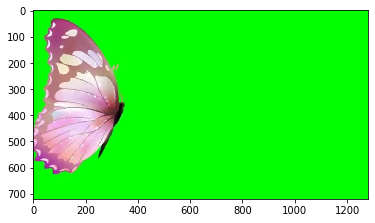

In [244]:
plt.imshow(cv2.cvtColor(test1, cv2.COLOR_BGR2RGB))

# <font color = red>통계적인 의미를 가지려면</font>
- 특정 값만을 기준으로 하지말고
- 값을 평균이 우리가 찾은 값, variance=1일 정규분포로 가정하면
- 값이 얼마일 때 정확한 확률값을 추정할 수 있음.
- 정규분포를 따를 떼 확률분포값을 추정할 수 있고, 신뢰구간에 대한 추정이 가능함.
- 95%면 평균으로부터 3시그마까지, 분산이 1이라면 평균 -3, 평균 + 3까지로 하면 데이터의 95%를 설명할 수 있다는 의미.
